# Machile Learning Project


## Project Checklist:
**1. Frame the problem and look at the big picture** <br>
**2. Get the data** <br>
**3. Explore it, gain insights** <br>
**4. Prepare it to better expose the underlying data patterns to Machine Learning algorithms** <br>
**5. Explore many different models and short-list the best ones** <br>
**6. Fine-tune your models and combine them into a great solution** <br>
**7. Present your solution** <br>
**8. Launch, monitor and maintain your system** <br>

### Project managers:
*Boyoon Choi* <br>
*Amaury Obadia* <br>
*Manon Paulat* <br>
*Horatiu Vlad Savin* <br>

### 1. Frame the problem
**a. Define the objective in business terms.** <br>
**b. How will your solution be used?** <br>
**c. What are the current solutions / workarounds (if any)?** <br>
**d. How should you frame this problem? (supervised/unsupervised, online/offline,etc.)** <br>
**e. How should performance be measured?** <br>
**f. Is the performance measure aligned with the business objective?** <br>
**g. What would be the minimum performance needed to reach the business objective?** <br>
**h. What are comparable problems? Can you reuse experience or tools?** <br>
**i. Is human expertise available?** <br>
**j. How would you solve the problem manually?** <br>
**k. List the assumptions you (or others) have made so far.** <br>
**i. Verify assumptions if possible.** <br>

### 2. Getting the Data and looking at the big picture

**a) Convert the data to a format you can easily manipulate (without changing the data itself)** <br>
**b) Ensure sensitive information is deleted or protected (eg. anonymized)** <br>
**c) Check the size and type of data (time series, sample, geographical, etc.)** <br>
**d) Sample a test set, put it aside and never look at it (no data snooping!)** <br>

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from functools import reduce 
import matplotlib.pyplot as plt 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
%matplotlib inline
import warnings
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble.forest import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model.stochastic_gradient import SGDClassifier
from sklearn.linear_model.passive_aggressive import PassiveAggressiveClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
import operator
import warnings
warnings.filterwarnings("ignore")

In [2]:
# loading the data
#import data (xlsx file)
df_demographics = pd.read_excel('DMML_Project_Dataset.xlsx',sheet_name='Soc_Dem')
df_balance = pd.read_excel('DMML_Project_Dataset.xlsx',sheet_name='Products_ActBalance')
df_in_out_flow = pd.read_excel('DMML_Project_Dataset.xlsx',sheet_name='Inflow_Outflow')
df_sales = pd.read_excel('DMML_Project_Dataset.xlsx',sheet_name='Sales_Revenues')

### Removing all values that are missing: name, sex, tenure

In [3]:
#import data
df_demographics = pd.read_excel('DMML_Project_Dataset.xlsx',sheet_name='Soc_Dem')
df_balance = pd.read_excel('DMML_Project_Dataset.xlsx',sheet_name='Products_ActBalance')
df_in_out_flow = pd.read_excel('DMML_Project_Dataset.xlsx',sheet_name='Inflow_Outflow')
df_sales = pd.read_excel('DMML_Project_Dataset.xlsx',sheet_name='Sales_Revenues')

#drop rows with nan
#print(df_demographics.shape)
df_demographics = df_demographics.dropna()
#print(df_demographics.shape) #dropna() works !

df_demographics = df_demographics.set_index('Client')
df_balance = df_balance.set_index('Client')
df_in_out_flow = df_in_out_flow.set_index('Client')
df_sales = df_sales.set_index('Client')

print("columns in demographics : " + str(df_demographics.columns)+"\n")
print("columns in balance : " + str(df_balance.columns)+"\n")
print("columns in in out flow : " + str(df_in_out_flow.columns)+"\n")
print("columns in sales : " + str(df_sales.columns)+"\n")

#join the tables
df = df_demographics.join(df_balance)
df = df.join(df_in_out_flow)
df = df.join(df_sales)

#replace sex data type to intergers
df["Sex"] = df["Sex"].map( {'M':1, 'F':0} )
df["Age"] = df["Age"].astype(int)

print("df shape : " + str(df.shape))

columns in demographics : Index(['Sex', 'Age', 'Tenure'], dtype='object')

columns in balance : Index(['Count_CA', 'Count_SA', 'Count_MF', 'Count_OVD', 'Count_CC', 'Count_CL',
       'ActBal_CA', 'ActBal_SA', 'ActBal_MF', 'ActBal_OVD', 'ActBal_CC',
       'ActBal_CL'],
      dtype='object')

columns in in out flow : Index(['VolumeCred', 'VolumeCred_CA', 'TransactionsCred',
       'TransactionsCred_CA', 'VolumeDeb', 'VolumeDeb_CA',
       'VolumeDebCash_Card', 'VolumeDebCashless_Card',
       'VolumeDeb_PaymentOrder', 'TransactionsDeb', 'TransactionsDeb_CA',
       'TransactionsDebCash_Card', 'TransactionsDebCashless_Card',
       'TransactionsDeb_PaymentOrder'],
      dtype='object')

columns in sales : Index(['Sale_MF', 'Sale_CC', 'Sale_CL', 'Revenue_MF', 'Revenue_CC',
       'Revenue_CL'],
      dtype='object')

df shape : (1612, 35)


### Understanding and structuring of the dataset  
   **• type (categorical, int/float, bounded/unbounded, text, structured, etc.)** <br>

In [4]:
#df_demographics
demo = df_demographics.pivot_table(index='Sex',values='Age',aggfunc='mean')
print(demo)

           Age
Sex           
F    42.354497
M    43.290888


In [5]:
client = df_demographics.pivot_table(index='Client',values='Sex',aggfunc='sum')
print(client)

       Sex
Client    
1        F
2        M
3        M
4        M
5        F
...     ..
1611     F
1612     M
1613     M
1614     M
1615     M

[1612 rows x 1 columns]


In [6]:
tenure = df_demographics.pivot_table(index='Sex',values='Tenure',aggfunc='sum')
print(tenure)

     Tenure
Sex        
F     77013
M     86457


In [7]:
#Mean demographics
df_demographics.mean()

Age        42.851737
Tenure    101.408189
dtype: float64

In [8]:
df_demographics.nunique()

Sex         2
Age        94
Tenure    248
dtype: int64

In [9]:
print(df_demographics.dtypes)

Sex       object
Age        int64
Tenure     int64
dtype: object


In [10]:
# structure of the data set df_sales
df_sales

,Sale_MF,Sale_CC,Sale_CL,Revenue_MF,Revenue_CC,Revenue_CL
Client,,,,,,
1094,0,1,0,0.000000,5.138571,0.000000
1484,1,0,1,25.609107,0.000000,8.722500
20,0,1,0,0.000000,3.822500,0.000000
1193,0,0,0,0.000000,0.000000,0.000000
142,0,0,0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...
1316,0,0,1,0.000000,0.000000,3.317500
905,1,1,1,1.761071,0.892857,13.166786
938,0,1,1,0.000000,4.928571,7.812143


In [11]:
print(df_sales.dtypes)

Sale_MF         int64
Sale_CC         int64
Sale_CL         int64
Revenue_MF    float64
Revenue_CC    float64
Revenue_CL    float64
dtype: object


In [12]:
# structure of the data set df_balance
df_balance

,Count_CA,Count_SA,Count_MF,Count_OVD,Count_CC,Count_CL,ActBal_CA,ActBal_SA,ActBal_MF,ActBal_OVD,ActBal_CC,ActBal_CL
Client,,,,,,,,,,,,
1,1,NaN,NaN,1.0,NaN,NaN,1333.802857,NaN,NaN,0.0,NaN,NaN
2,1,1.0,NaN,NaN,NaN,NaN,110.768571,13326.190357,NaN,NaN,NaN,NaN
3,1,NaN,1.0,NaN,NaN,NaN,482.654643,NaN,107.251786,NaN,NaN,NaN
4,1,1.0,NaN,NaN,1.0,NaN,1599.840714,76.437143,NaN,NaN,1110.381786,NaN
5,1,1.0,NaN,NaN,NaN,NaN,5353.483929,8079.715714,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1611,1,NaN,NaN,1.0,NaN,NaN,0.000000,NaN,NaN,0.0,NaN,NaN
1612,1,NaN,NaN,1.0,NaN,1.0,170.593214,NaN,NaN,0.0,NaN,6250.0
1613,1,NaN,NaN,NaN,NaN,NaN,676.008571,NaN,NaN,NaN,NaN,NaN


In [13]:
print(df_balance.dtypes)

Count_CA        int64
Count_SA      float64
Count_MF      float64
Count_OVD     float64
Count_CC      float64
Count_CL      float64
ActBal_CA     float64
ActBal_SA     float64
ActBal_MF     float64
ActBal_OVD    float64
ActBal_CC     float64
ActBal_CL     float64
dtype: object


In [14]:
# structure of the data set df_in_out_flow
df_in_out_flow

,VolumeCred,VolumeCred_CA,TransactionsCred,TransactionsCred_CA,VolumeDeb,VolumeDeb_CA,VolumeDebCash_Card,VolumeDebCashless_Card,VolumeDeb_PaymentOrder,TransactionsDeb,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDebCashless_Card,TransactionsDeb_PaymentOrder
Client,,,,,,,,,,,,,,
1017,0.005000,0.005000,1,1,118.046429,118.046429,25.000000,91.796429,0.000000,12,12,2,9,0
1456,364.772143,364.752857,4,3,774.980000,774.980000,14.285714,497.444286,258.607143,28,28,1,20,5
545,2471.719286,2471.719286,14,14,2190.257143,2190.257143,303.571429,179.082143,1229.428571,23,23,3,5,12
667,1127.792857,1127.792857,4,4,1344.603571,1344.603571,642.857143,194.285714,249.321429,21,21,3,4,8
1381,571.618214,571.618214,3,3,57.071429,57.071429,10.714286,46.357143,0.000000,6,6,1,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,1175.480357,1171.326071,8,6,465.500000,465.500000,0.000000,31.607143,430.500000,10,10,0,2,7
1079,281.812857,281.812857,2,2,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0
1126,283.104643,283.104643,2,2,40.285714,40.285714,0.000000,0.000000,39.285714,2,2,0,0,1


In [15]:
print(df_in_out_flow.dtypes)

VolumeCred                      float64
VolumeCred_CA                   float64
TransactionsCred                  int64
TransactionsCred_CA               int64
VolumeDeb                       float64
VolumeDeb_CA                    float64
VolumeDebCash_Card              float64
VolumeDebCashless_Card          float64
VolumeDeb_PaymentOrder          float64
TransactionsDeb                   int64
TransactionsDeb_CA                int64
TransactionsDebCash_Card          int64
TransactionsDebCashless_Card      int64
TransactionsDeb_PaymentOrder      int64
dtype: object


## Data cleaning
**• Fix or remove outliers (optional).** <br>
**• Fill in missing values (eg. with zero, mean, median…) or drop their rows (or columns).** <br>

In [16]:
#drop rows with na
print(df_demographics.shape)
df_demographics = df_demographics.dropna()
print(df_demographics.shape) #dropna() works !

(1612, 3)
(1612, 3)


In [17]:
df_60 = df[~(df['Sale_MF'].apply(np.isnan))].fillna(0) #60% of clients
df_40 = df[df['Sale_MF'].apply(np.isnan)].fillna(0) #40% of clients without sales, revenue data

X = df_60.drop(['Sale_MF', 'Sale_CC', 'Sale_CL', 'Revenue_MF', 'Revenue_CC','Revenue_CL'], axis=1)
Y = df_60[['Sale_MF', 'Sale_CC', 'Sale_CL', 'Revenue_MF', 'Revenue_CC','Revenue_CL']]

print(X.shape)
print(Y.shape)

(967, 29)
(967, 6)


In [18]:
# building the x dataframe
dfx = df_60.drop(['Revenue_MF', 'Revenue_CL','Revenue_CC','Sale_MF', 'Sale_CC', 'Sale_CL'], axis = 1)
dfx

,Sex,Age,Tenure,Count_CA,Count_SA,Count_MF,Count_OVD,Count_CC,Count_CL,ActBal_CA,...,VolumeDeb,VolumeDeb_CA,VolumeDebCash_Card,VolumeDebCashless_Card,VolumeDeb_PaymentOrder,TransactionsDeb,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDebCashless_Card,TransactionsDeb_PaymentOrder
Client,,,,,,,,,,,,,,,,,,,,,
1217,1,38,165,1,0.0,0.0,0.0,0.0,0.0,6752.244643,...,714.285714,714.285714,0.000000,0.000000,714.285714,1.0,1.0,0.0,0.0,1.0
850,0,49,44,1,0.0,0.0,0.0,0.0,0.0,43.523214,...,1226.345357,1226.345357,0.000000,0.000000,121.928571,6.0,6.0,0.0,0.0,1.0
1473,1,54,34,1,1.0,0.0,0.0,1.0,1.0,29.024286,...,3875.137857,3794.580714,357.142857,444.597500,2076.785714,48.0,38.0,1.0,26.0,11.0
1038,1,29,106,1,0.0,0.0,0.0,0.0,0.0,27.035714,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
225,1,14,187,1,0.0,0.0,1.0,0.0,0.0,345.686071,...,130.521429,130.521429,0.000000,111.235714,19.285714,5.0,5.0,0.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,0,37,152,1,1.0,0.0,0.0,0.0,0.0,1249.709643,...,0.288929,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0
1276,1,28,145,1,0.0,0.0,0.0,0.0,2.0,13915.925357,...,165.928571,155.107143,35.714286,0.000000,0.000000,6.0,4.0,1.0,0.0,0.0
384,1,23,160,1,0.0,0.0,0.0,0.0,0.0,2418.876786,...,88.443929,88.443929,50.000000,37.372500,1.071429,8.0,8.0,2.0,5.0,1.0


In [19]:
#assigning value 0 to NaN
#as noticed from the dataset structuring section above there are multiple values that have NaN therefore we decided to replace the missing values with 0

df_60 = df_60.fillna(value = 0)
df_60

,Sex,Age,Tenure,Count_CA,Count_SA,Count_MF,Count_OVD,Count_CC,Count_CL,ActBal_CA,...,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDebCashless_Card,TransactionsDeb_PaymentOrder,Sale_MF,Sale_CC,Sale_CL,Revenue_MF,Revenue_CC,Revenue_CL
Client,,,,,,,,,,,,,,,,,,,,,
1217,1,38,165,1,0.0,0.0,0.0,0.0,0.0,6752.244643,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
850,0,49,44,1,0.0,0.0,0.0,0.0,0.0,43.523214,...,6.0,0.0,0.0,1.0,0.0,1.0,0.0,0.000000,0.893929,0.000000
1473,1,54,34,1,1.0,0.0,0.0,1.0,1.0,29.024286,...,38.0,1.0,26.0,11.0,1.0,0.0,0.0,4.929643,0.000000,0.000000
1038,1,29,106,1,0.0,0.0,0.0,0.0,0.0,27.035714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
225,1,14,187,1,0.0,0.0,1.0,0.0,0.0,345.686071,...,5.0,0.0,4.0,1.0,0.0,0.0,1.0,0.000000,0.000000,8.130714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,0,37,152,1,1.0,0.0,0.0,0.0,0.0,1249.709643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
1276,1,28,145,1,0.0,0.0,0.0,0.0,2.0,13915.925357,...,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
384,1,23,160,1,0.0,0.0,0.0,0.0,0.0,2418.876786,...,8.0,2.0,5.0,1.0,0.0,1.0,1.0,0.000000,6.107143,12.506071


# Exploring the data


**a. Visualize the data.** <br>
**b. Study the correlations between attributes.** <br>
**c. Study how you would solve the problem manually.** <br>
**d. Identify the promising transformations you may want to apply.** <br>

**Dividing the 60% dataset into 3 offers**

                              Sex  Age  Tenure  Count_CA  Count_SA  Count_MF  \
Sex                           1.0  NaN     NaN       NaN       NaN       NaN   
Age                           NaN  1.0     NaN       NaN       NaN       NaN   
Tenure                        NaN  NaN     1.0       NaN       NaN       NaN   
Count_CA                      NaN  NaN     NaN       1.0       NaN       NaN   
Count_SA                      NaN  NaN     NaN       NaN       1.0       NaN   
Count_MF                      NaN  NaN     NaN       NaN       NaN       1.0   
Count_OVD                     NaN  NaN     NaN       NaN       NaN       NaN   
Count_CC                      NaN  NaN     NaN       NaN       NaN       NaN   
Count_CL                      NaN  NaN     NaN       NaN       NaN       NaN   
ActBal_CA                     NaN  NaN     NaN       NaN       NaN       NaN   
ActBal_SA                     NaN  NaN     NaN       NaN       NaN       NaN   
ActBal_MF                     NaN  NaN  

NameError: name 'df_salesrevenue' is not defined

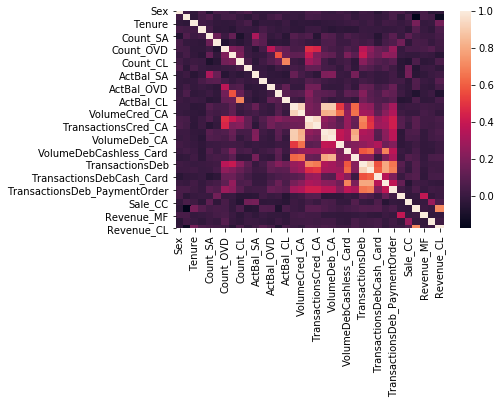

In [20]:
# Customer identification for: nr. of customers, total revenue and the ratio between the two ratios

df_cor=df_60.corr()
sns.heatmap(df_cor)
df_cor2 = df_cor[df_cor>0.35]
print(df_cor2)

print("\n\nnumber of customers of Sale_MF : " + str(df_salesrevenue['Sale_MF'].sum()))
print("number of customers of Sale_CC : " + str(df_salesrevenue['Sale_CC'].sum()))
print("number of customers of Sale_CL : " + str(df_salesrevenue['Sale_CL'].sum()))

print("\n\ntotal revenue on MF : " + str(df_salesrevenue['Revenue_MF'].sum()))
print("total revenue on CC : " + str(df_salesrevenue['Revenue_CC'].sum()))
print("total revenue on CL : " + str(df_salesrevenue['Revenue_CL'].sum()))

print("\ntotla revenue / number of customers")
print("MF : " + str(df_salesrevenue['Revenue_MF'].sum()/df_salesrevenue['Sale_MF'].sum()))
print("CC : " + str(df_salesrevenue['Revenue_CC'].sum()/df_salesrevenue['Sale_CC'].sum()))
print("CL : " + str(df_salesrevenue['Revenue_CL'].sum()/df_salesrevenue['Sale_CL'].sum()))

#Let's do the qcut() !

**This analysis enabled to have a statisical overview of the vaiables helping to determine the best ratio** <br>


**Below we conducted a correlation inside the 60% of the data (that does not have any mission values) with Revenue_CL**

            Sale_CL  Revenue_CL  Count_CA  Count_SA  Count_MF  Count_OVD  \
Sale_CL         NaN         NaN       NaN       NaN       NaN        NaN   
Revenue_CL      NaN    1.000000       NaN       NaN       NaN        NaN   
Count_CA        NaN         NaN       1.0       NaN       NaN        NaN   
Count_SA        NaN         NaN       NaN  1.000000       NaN        NaN   
Count_MF        NaN         NaN       NaN       NaN       1.0        NaN   
Count_OVD       NaN         NaN       NaN       NaN       NaN        NaN   
Count_CC        NaN         NaN       NaN       NaN       NaN        NaN   
Count_CL        NaN         NaN       NaN       NaN       NaN        NaN   
ActBal_CA       NaN         NaN       NaN  0.251416       NaN        NaN   
ActBal_SA       NaN    0.388938       NaN  0.252020       NaN        NaN   
ActBal_MF       NaN         NaN       NaN       NaN       NaN        NaN   
ActBal_OVD      NaN         NaN       NaN       NaN       NaN        NaN   
ActBal_CC   

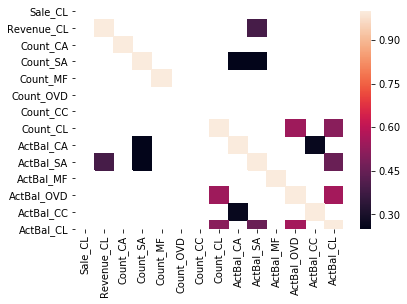

In [21]:
df_rcl = df_60[df_60['Revenue_CL']!=0.000] #60% of clients
df_rcl=df_rcl[['Sale_CL','Revenue_CL']]
df_rcl=df_rcl.join(df[['Count_CA', 'Count_SA', 'Count_MF', 'Count_OVD', 'Count_CC',
       'Count_CL', 'ActBal_CA', 'ActBal_SA', 'ActBal_MF', 'ActBal_OVD',
       'ActBal_CC', 'ActBal_CL']])
#print(df_rcl)
df_rcl_cor = df_rcl.corr()
df_rcl2_cor = df_rcl_cor[df_rcl_cor>0.25]
print(df_rcl2_cor)
sns.heatmap(df_rcl2_cor)

### We are trying to establish a baseline for any correlation between those clients who generated Revenue_CL and columns in df_in_out_flow

                              Sale_CL  Revenue_CL  VolumeCred  VolumeCred_CA  \
Sale_CL                           NaN         NaN         NaN            NaN   
Revenue_CL                        NaN         1.0         NaN            NaN   
VolumeCred                        NaN         NaN    1.000000       0.818690   
VolumeCred_CA                     NaN         NaN    0.818690       1.000000   
TransactionsCred                  NaN         NaN         NaN            NaN   
TransactionsCred_CA               NaN         NaN         NaN            NaN   
VolumeDeb                         NaN         NaN    0.946829       0.816388   
VolumeDeb_CA                      NaN         NaN    0.864075       0.787967   
VolumeDebCash_Card                NaN         NaN         NaN            NaN   
VolumeDebCashless_Card            NaN         NaN    0.444647       0.590249   
VolumeDeb_PaymentOrder            NaN         NaN    0.796586       0.679870   
TransactionsDeb                   NaN   

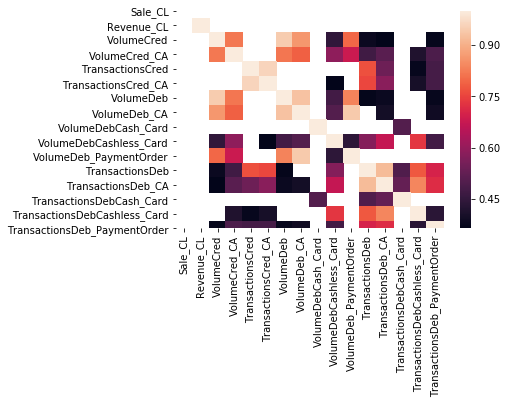

In [22]:
df_rcl = df_60[df_60['Revenue_CL']!=0.000] #60% of clients
df_rcl=df_rcl[['Sale_CL','Revenue_CL']]
df_rcl=df_rcl.join(df_in_out_flow)
#print(df_rcl)
df_rcl_cor = df_rcl.corr()
df_rcl2_cor = df_rcl_cor[df_rcl_cor>0.35]
print(df_rcl2_cor)
sns.heatmap(df_rcl2_cor)

### The code below tries to find any correlation between those clients who generated Revenue_CL and columns in df_demographics

            Sale_CL  Revenue_CL  Age  Tenure
Sale_CL         NaN         NaN  NaN     NaN
Revenue_CL      NaN         1.0  NaN     NaN
Age             NaN         NaN  1.0     NaN
Tenure          NaN         NaN  NaN     1.0


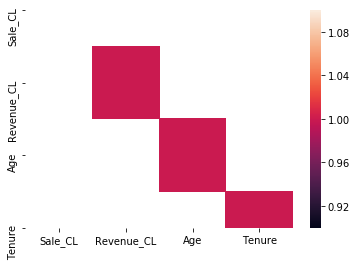

In [23]:
df_rcl = df_60[df_60['Revenue_CL']!=0.000] #60% of clients
df_rcl=df_rcl[['Sale_CL','Revenue_CL']]
df_rcl=df_rcl.join(df_demographics)
#print(df_rcl)
df_rcl_cor = df_rcl.corr()
df_rcl2_cor = df_rcl_cor[df_rcl_cor>0.35]
print(df_rcl2_cor)
sns.heatmap(df_rcl2_cor)

### Let's try the same thing with with 'Revenue_CC'

            Sale_CC  Revenue_CC  Age  Tenure
Sale_CC         NaN         NaN  NaN     NaN
Revenue_CC      NaN         1.0  NaN     NaN
Age             NaN         NaN  1.0     NaN
Tenure          NaN         NaN  NaN     1.0


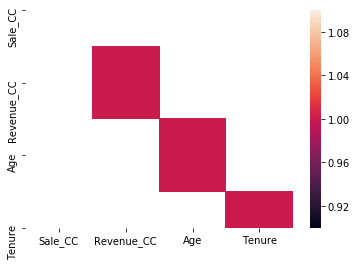

In [24]:
df_rcc = df_60[df_60['Revenue_CC']!=0.000] #60% of clients
df_rcc=df_rcc[['Sale_CC','Revenue_CC']]
df_rcc=df_rcc.join(df_demographics)
#print(df_rcl)
df_rcc_cor = df_rcc.corr()
df_rcc2_cor = df_rcc_cor[df_rcc_cor>0.35]
print(df_rcc2_cor)
sns.heatmap(df_rcc2_cor)

            Sale_CC  Revenue_CC  Count_CA  Count_SA  Count_MF  Count_OVD  \
Sale_CC         NaN         NaN       NaN       NaN       NaN        NaN   
Revenue_CC      NaN    1.000000       NaN       NaN       NaN        NaN   
Count_CA        NaN         NaN       1.0       NaN       NaN        NaN   
Count_SA        NaN         NaN       NaN       1.0       NaN        NaN   
Count_MF        NaN         NaN       NaN       NaN  1.000000        NaN   
Count_OVD       NaN         NaN       NaN       NaN       NaN        NaN   
Count_CC        NaN         NaN       NaN       NaN       NaN        NaN   
Count_CL        NaN    0.584321       NaN       NaN       NaN        NaN   
ActBal_CA       NaN         NaN       NaN       NaN       NaN        NaN   
ActBal_SA       NaN         NaN       NaN       NaN  0.577317        NaN   
ActBal_MF       NaN         NaN       NaN       NaN       NaN        NaN   
ActBal_OVD      NaN         NaN       NaN       NaN       NaN        NaN   
ActBal_CC   

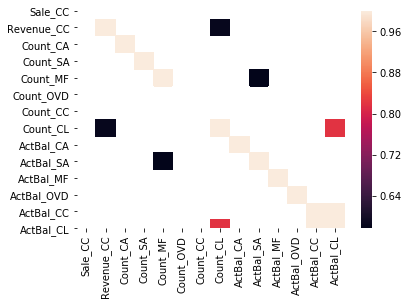

In [25]:
df_rcc = df_60[df_60['Revenue_CC']!=0.000] #60% of clients
df_rcc=df_rcc[['Sale_CC','Revenue_CC']]
df_rcc=df_rcc.join(df_balance)
#print(df_rcl)
df_rcc_cor = df_rcc.corr()
df_rcc2_cor = df_rcc_cor[df_rcc_cor>0.35]
print(df_rcc2_cor)
sns.heatmap(df_rcc2_cor)

                              Sale_CC  Revenue_CC  VolumeCred  VolumeCred_CA  \
Sale_CC                           NaN         NaN         NaN            NaN   
Revenue_CC                        NaN         1.0         NaN            NaN   
VolumeCred                        NaN         NaN    1.000000       0.864857   
VolumeCred_CA                     NaN         NaN    0.864857       1.000000   
TransactionsCred                  NaN         NaN         NaN            NaN   
TransactionsCred_CA               NaN         NaN         NaN            NaN   
VolumeDeb                         NaN         NaN    0.976484       0.833229   
VolumeDeb_CA                      NaN         NaN    0.952635       0.830426   
VolumeDebCash_Card                NaN         NaN         NaN            NaN   
VolumeDebCashless_Card            NaN         NaN         NaN            NaN   
VolumeDeb_PaymentOrder            NaN         NaN    0.934572       0.838061   
TransactionsDeb                   NaN   

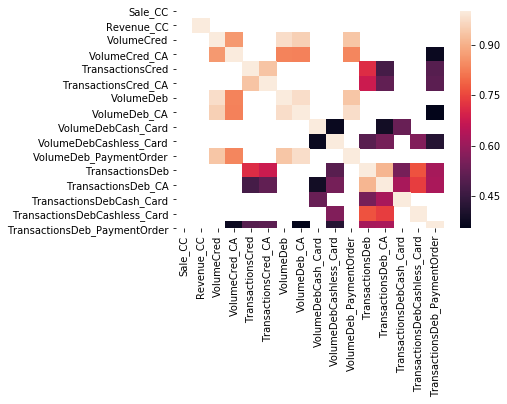

In [26]:
df_rcc = df_60[df_60['Revenue_CC']!=0.000] #60% of clients
df_rcc=df_rcc[['Sale_CC','Revenue_CC']]
df_rcc=df_rcc.join(df_in_out_flow)
#print(df_rcl)
df_rcc_cor = df_rcc.corr()
df_rcc2_cor = df_rcc_cor[df_rcc_cor>0.35]
print(df_rcc2_cor)
sns.heatmap(df_rcc2_cor)

### Let's do the same thing with 'Revenue_MF'

            Sale_MF  Revenue_MF  Age  Tenure
Sale_MF         NaN         NaN  NaN     NaN
Revenue_MF      NaN         1.0  NaN     NaN
Age             NaN         NaN  1.0     NaN
Tenure          NaN         NaN  NaN     1.0


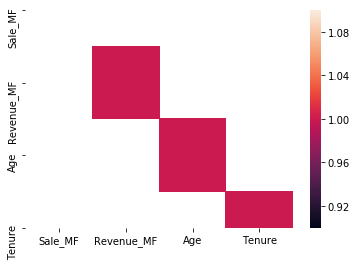

In [27]:
df_rmf = df_60[df_60['Revenue_MF']!=0.000] #60% of clients
df_rmf=df_rmf[['Sale_MF','Revenue_MF']]
df_rmf=df_rmf.join(df_demographics)

df_rmf_cor = df_rmf.corr()
df_rmf2_cor = df_rmf_cor[df_rmf_cor>0.35]
print(df_rmf2_cor)
sns.heatmap(df_rmf2_cor)

            Sale_MF  Revenue_MF  Count_CA  Count_SA  Count_MF  Count_OVD  \
Sale_MF         NaN         NaN       NaN       NaN       NaN        NaN   
Revenue_MF      NaN    1.000000       NaN  0.599189       NaN        NaN   
Count_CA        NaN         NaN       1.0       NaN       NaN        NaN   
Count_SA        NaN    0.599189       NaN  1.000000       NaN        NaN   
Count_MF        NaN         NaN       NaN       NaN       1.0        NaN   
Count_OVD       NaN         NaN       NaN       NaN       NaN        NaN   
Count_CC        NaN         NaN       NaN       NaN       NaN        NaN   
Count_CL        NaN         NaN       NaN       NaN       NaN        NaN   
ActBal_CA       NaN         NaN       NaN       NaN       NaN        NaN   
ActBal_SA       NaN         NaN       NaN       NaN       NaN        NaN   
ActBal_MF       NaN         NaN       NaN  0.457670       NaN        NaN   
ActBal_OVD      NaN         NaN       NaN       NaN       NaN        NaN   
ActBal_CC   

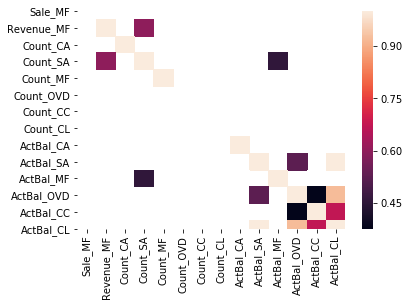

In [28]:
df_rmf = df_60[df_60['Revenue_MF']!=0.000] #60% of clients
df_rmf=df_rmf[['Sale_MF','Revenue_MF']]
df_rmf=df_rmf.join(df_balance)

df_rmf_cor = df_rmf.corr()
df_rmf2_cor = df_rmf_cor[df_rmf_cor>0.35]
print(df_rmf2_cor)
sns.heatmap(df_rmf2_cor)

                              Sale_MF  Revenue_MF  VolumeCred  VolumeCred_CA  \
Sale_MF                           NaN         NaN         NaN            NaN   
Revenue_MF                        NaN         1.0         NaN            NaN   
VolumeCred                        NaN         NaN    1.000000       0.979028   
VolumeCred_CA                     NaN         NaN    0.979028       1.000000   
TransactionsCred                  NaN         NaN         NaN            NaN   
TransactionsCred_CA               NaN         NaN         NaN            NaN   
VolumeDeb                         NaN         NaN    0.835043       0.775353   
VolumeDeb_CA                      NaN         NaN    0.831063       0.782974   
VolumeDebCash_Card                NaN         NaN         NaN            NaN   
VolumeDebCashless_Card            NaN         NaN    0.432400       0.418027   
VolumeDeb_PaymentOrder            NaN         NaN    0.677987       0.622610   
TransactionsDeb                   NaN   

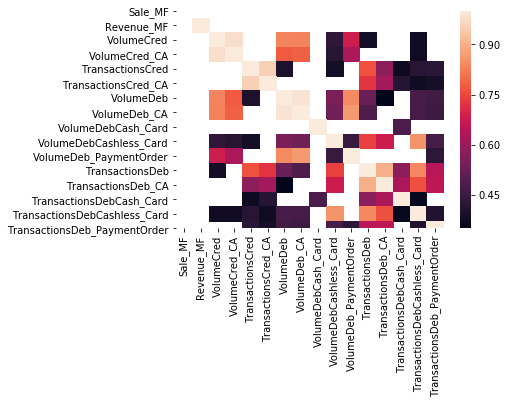

In [29]:
df_rmf = df_60[df_60['Revenue_MF']!=0.000] #60% of clients
df_rmf=df_rmf[['Sale_MF','Revenue_MF']]
df_rmf=df_rmf.join(df_in_out_flow)

df_rmf_cor = df_rmf.corr()
df_rmf2_cor = df_rmf_cor[df_rmf_cor>0.35]
print(df_rmf2_cor)
sns.heatmap(df_rmf2_cor)

       ActBal_CA   ActBal_CC    ActBal_CL     ActBal_MF  ActBal_OVD  \
Sex                                                                   
0    2382.036524  307.042920  4532.035318  22033.367657  123.911742   
1    2487.616856  389.712425  4035.246562  19187.691225  128.555789   

        ActBal_SA        Age  Count_CA  Count_CC  Count_CL  ...  \
Sex                                                         ...   
0    13978.922256  42.354497  1.066138       1.0  1.181818  ...   
1    16506.396801  43.290888  1.089953       1.0  1.187500  ...   

     TransactionsDebCashless_Card  TransactionsDeb_CA  \
Sex                                                     
0                        5.383580           13.714670   
1                        5.118906           13.491082   

     TransactionsDeb_PaymentOrder   VolumeCred  VolumeCred_CA    VolumeDeb  \
Sex                                                                          
0                        4.493943  1741.092540    1467.123012

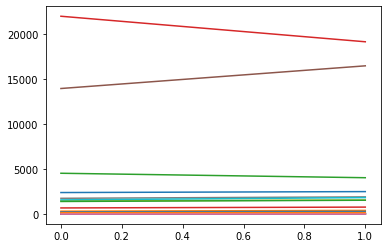

In [30]:
#df2 = df[['Sex','TransactionsDebCashless_Card','TransactionsDeb_PaymentOrder']]
var = df.pivot_table(index = 'Sex', aggfunc='mean')
print(var)

fig,ax=plt.subplots()
ax.plot(var)

# Model testing

## Random Forest Classifier

In [31]:
x = dfx.fillna(0)

# target variable
y = df_60["Sale_MF"].fillna(0)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, shuffle = True)

model_kfold = RandomForestClassifier(n_estimators=5)
kfold = KFold(n_splits=10, random_state=0, shuffle = True)
results_kfold = cross_val_score(model_kfold, x_train, y_train, cv=kfold, scoring= "recall")
results_kfold2 = cross_val_score(model_kfold, x_train, y_train, cv=kfold, scoring= "precision")
results_kfold3 = cross_val_score(model_kfold, x_train, y_train, cv=kfold, scoring= "accuracy")
results_kfold4 = cross_val_score(model_kfold, x_train, y_train, cv=kfold, scoring= "f1")
print(results_kfold.mean())
print(results_kfold2.mean())
print(results_kfold3.mean())
print(results_kfold4.mean())

0.13136164274322165
0.37974358974358974
0.7670995670995671
0.1716337285902503


### KNN Nearest neighbour

In [32]:
#KNN
x = dfx.fillna(0)

# target variable
y = df_60['Sale_MF'].fillna(0)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0, shuffle = True)


model_kfold = KNeighborsClassifier(n_neighbors = 6)
kfold = KFold(n_splits=10, random_state=0, shuffle = True)
results_kfold = cross_val_score(model_kfold, x_train, y_train, cv=kfold, scoring= "recall")
results_kfold2 = cross_val_score(model_kfold, x_train, y_train, cv=kfold, scoring= "precision")
results_kfold3 = cross_val_score(model_kfold, x_train, y_train, cv=kfold, scoring= "accuracy")
print(results_kfold.mean())
print(results_kfold2.mean())
print(results_kfold3.mean())

0.030833333333333334
0.25
0.8137931034482758


## Decision Tree Clasifier

In [33]:
# Decision trees
X= dfx.fillna(0)

# target variable
y = df_60['Sale_MF'].fillna(0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle = True)

model_kfold = DecisionTreeClassifier()
kfold = KFold(n_splits=10, random_state=0, shuffle = True)
results_kfold = cross_val_score(model_kfold, X_train, y_train, cv=kfold, scoring= "recall")
results_kfold2 = cross_val_score(model_kfold, X_train, y_train, cv=kfold, scoring= "precision")
results_kfold3 = cross_val_score(model_kfold, X_train, y_train, cv=kfold, scoring= "accuracy")
print(results_kfold.mean())
print(results_kfold2.mean())
print(results_kfold3.mean())

0.3094902027796765
0.2555803445780226
0.7139360639360639


## Extra Trees Classifier

In [34]:
x= dfx

# target variable
y = df_60['Sale_MF']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, shuffle = True)

model_kfold = ExtraTreesClassifier(n_estimators = 5, random_state = 0)
kfold = KFold(n_splits=10, random_state=0, shuffle = True)
results_kfold = cross_val_score(model_kfold, X_train, y_train, cv=kfold, scoring= "recall")
results_kfold2 = cross_val_score(model_kfold, X_train, y_train, cv=kfold, scoring= "precision")
results_kfold3 = cross_val_score(model_kfold, X_train, y_train, cv=kfold, scoring= "accuracy")
print(results_kfold.mean())
print(results_kfold2.mean())
print(results_kfold3.mean())

0.16410856687172476
0.3378174603174603
0.77992007992008


## Naive Bayes 

In [35]:
x= dfx

# target variable
y = df_60['Sale_MF']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, shuffle = True)

model_kfold = GaussianNB()
kfold = KFold(n_splits=10, random_state=0, shuffle = True)
results_kfold = cross_val_score(model_kfold, X_train, y_train, cv=kfold, scoring= "recall")
results_kfold2 = cross_val_score(model_kfold, X_train, y_train, cv=kfold, scoring= "precision")
results_kfold3 = cross_val_score(model_kfold, X_train, y_train, cv=kfold, scoring= "accuracy")
print(results_kfold.mean())
print(results_kfold2.mean())
print(results_kfold3.mean())

0.7939547732968787
0.20084833540143626
0.3675324675324675


## SGDC Classifier

In [36]:
x = dfx

# target variable
y = df_60['Sale_MF']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, shuffle = True)

model_kfold = SGDClassifier(random_state = 0, alpha = 0.00001)

kfold = KFold(n_splits=10, random_state=0, shuffle = True)
results_kfold = cross_val_score(model_kfold, X_train, y_train, cv=kfold, scoring= "recall")
results_kfold2 = cross_val_score(model_kfold, X_train, y_train, cv=kfold, scoring= "precision")
results_kfold3 = cross_val_score(model_kfold, X_train, y_train, cv=kfold, scoring= "accuracy")
print(results_kfold.mean())
print(results_kfold2.mean())
print(results_kfold3.mean())

0.17378958760537705
0.22728057889822595
0.7388611388611389


## Passive Aggressive Classifier

In [37]:
x= dfx.fillna(0)

# target variable
y = df_60['Sale_MF'].fillna(0)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, shuffle = True)

model_kfold = PassiveAggressiveClassifier(random_state = 0) 
kfold = KFold(n_splits=10, random_state=0, shuffle = True)
results_kfold = cross_val_score(model_kfold, x_train, y_train, cv=kfold, scoring= "recall")
results_kfold2 = cross_val_score(model_kfold, x_train, y_train, cv=kfold, scoring= "precision")
results_kfold3 = cross_val_score(model_kfold, x_train, y_train, cv=kfold, scoring= "accuracy")
print(results_kfold.mean())
print(results_kfold2.mean())
print(results_kfold3.mean())

0.2880508088402825
0.19461477593354454
0.6547785547785547


## Linear SVC

In [38]:
x= dfx.fillna(0)

# target variable
y = df_60['Sale_MF']

x_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, shuffle = True)

model_kfold = LinearSVC(random_state=0, tol=1e-5)
kfold = KFold(n_splits=10, random_state=0, shuffle = True)
results_kfold = cross_val_score(model_kfold, x_train, y_train, cv=kfold, scoring= "recall")
results_kfold2 = cross_val_score(model_kfold, x_train, y_train, cv=kfold, scoring= "precision")
results_kfold3 = cross_val_score(model_kfold, x_train, y_train, cv=kfold, scoring= "accuracy")
print(results_kfold.mean())
print(results_kfold2.mean())
print(results_kfold3.mean())

0.43823080428343586
0.2259909021993293
0.5980852480852481


## Choosing the best Model

In [39]:
df_60 = df[~(df['Sale_MF'].apply(np.isnan))] #60% of clients
df_40 = df[df['Sale_MF'].apply(np.isnan)] #40% of clients without sales, revenue data

X = df_60.drop(['Sale_MF', 'Sale_CC', 'Sale_CL', 'Revenue_MF', 'Revenue_CC','Revenue_CL'], axis=1).fillna(0)
Y = df_60[['Sale_MF', 'Sale_CC', 'Sale_CL', 'Revenue_MF', 'Revenue_CC','Revenue_CL']].fillna(0)

print(X.shape)
print(Y.shape)

#will be used for classification
Y_smf = Y[['Sale_MF']]
print(Y_smf)

(967, 29)
(967, 6)
        Sale_MF
Client         
1217        0.0
850         0.0
1473        1.0
1038        0.0
225         0.0
...         ...
621         0.0
1276        0.0
384         0.0
977         1.0
629         0.0

[967 rows x 1 columns]


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Lasso,Ridge,SGDRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVC
from sklearn.linear_model.stochastic_gradient import SGDClassifier
from sklearn.metrics import confusion_matrix
import operator

from sklearn.metrics import recall_score,precision_score,f1_score


def run_regression_models(X,y):
    #scoring_reg='accuracy' #metrics to use
    results_reg = {} #dictionary to store results
    
    ##Linear Regression
    linreg = LinearRegression()
    print("RMSE of Linear Regression : ", end='')
    print(np.sqrt(-cross_val_score(linreg,X,y,cv=10,scoring='neg_mean_squared_error')).mean())
    results_reg["Linear Regression"] = np.sqrt(-cross_val_score(linreg,X,y,cv=10,scoring='neg_mean_squared_error')).mean()
    
    ##Lasso
    ls = Lasso()
    ls.fit(X,y)
    print("RMSE of Lasso : ", end='')
    print(np.sqrt(-cross_val_score(ls,X,y,cv=10,scoring='neg_mean_squared_error')).mean())
    results_reg["Lasso"] = np.sqrt(-cross_val_score(linreg,X,y,cv=10,scoring='neg_mean_squared_error')).mean()
    
    ##Ridge
    rg = Ridge()
    rg.fit(X,y)
    print("RMSE of Ridge : ", end='')
    print(np.sqrt(-cross_val_score(rg,X,y,cv=10,scoring='neg_mean_squared_error')).mean())
    results_reg["Ridge"] = np.sqrt(-cross_val_score(rg,X,y,cv=10,scoring='neg_mean_squared_error')).mean()
    
    ##SGDRegressor
    sgdr=SGDRegressor()
    sgdr.fit(X,y)
    print("RMSE of SGDRegressor : ", end='')
    print(np.sqrt(-cross_val_score(sgdr,X,y,cv=10,scoring='neg_mean_squared_error')).mean())
    results_reg["SGDRegressor"] = np.sqrt(-cross_val_score(sgdr,X,y,cv=10,scoring='neg_mean_squared_error')).mean()
    
    print(min(results_reg.items(),key=operator.itemgetter(-1)))
    
    return results_reg
    
    
def run_classification_models(X,y,scoring_cla):
    #KNeighbors
    #scoring_cla='accuracy' #metics to use
    results_cla = {} #dictionary to store results
    
    knn = KNeighborsClassifier()
    k_range=list(range(1,31))
    weight_options=['uniform','distance']
    param_dist = dict(n_neighbors=k_range, weights=weight_options)
    rand = RandomizedSearchCV(knn,param_dist,cv=10,scoring='accuracy',n_iter=10,return_train_score=False)
    rand.fit(X,y)
    print("Accuracy of KNeighbors : ", end='')
    print(rand.best_score_)
    print("Best parameters : ", end='')
    print(rand.best_params_)
    results_cla['KNN'] = rand.best_score_

    
    #Logistic Regression
    logreg = LogisticRegression(solver = 'liblinear') #for small dataset, liblinear solver is more accurate
    print(scoring_cla + " of Logistic Regression : ", end='')
    print(cross_val_score(logreg, X, y, cv=10, scoring=scoring_cla).mean())
    results_cla['LogisticRegression']=cross_val_score(logreg, X, y, cv=10, scoring=scoring_cla).mean()
    
    
    #Naive Bayes
    gnb = GaussianNB()
    print(scoring_cla + " of GaussainNB : ", end='')
    print(cross_val_score(gnb, X, y, cv=10, scoring=scoring_cla).mean())
    results_cla['GausianNB'] = cross_val_score(gnb, X, y, cv=10, scoring=scoring_cla).mean()
    
    #DecisionTreeClassifier
    dtc = DecisionTreeClassifier()
    print(scoring_cla + " of DecisionTreeClassifier : ", end='')
    print(cross_val_score(dtc, X, y, cv=10, scoring=scoring_cla).mean())
    results_cla['DecisionTreeClassifier']=cross_val_score(dtc, X, y, cv=10, scoring=scoring_cla).mean()
    
    #RandomForestClassifier
    rfc = RandomForestClassifier()
    print(scoring_cla + " of RandomForestClassifier : ", end='')
    print(cross_val_score(dtc, X, y, cv=10, scoring=scoring_cla).mean())
    results_cla['RandomForestClassifier']=cross_val_score(dtc, X, y, cv=10, scoring=scoring_cla).mean()
    
    #MLPClassifier
    mlp = MLPClassifier()
    print(scoring_cla + " of MLPClassifier : ", end='')
    print(cross_val_score(mlp, X, y, cv=10, scoring=scoring_cla).mean())
    results_cla['MLPClassifier']=cross_val_score(mlp, X, y, cv=10, scoring=scoring_cla).mean()
    
    #LinearSVC
    lsvc = LinearSVC()
    print(scoring_cla + " of LinearSVC : ", end='')
    print(cross_val_score(lsvc, X, y, cv=10, scoring=scoring_cla).mean())
    results_cla['LinearSVC']=cross_val_score(lsvc, X, y, cv=10, scoring=scoring_cla).mean()
    
    #SGDC Classifier
    sgdc = SGDClassifier()
    print(scoring_cla + " of SGDC Classifier : ", end='')
    print(cross_val_score(sgdc, X, y, cv=10, scoring=scoring_cla).mean())
    results_cla['SGDCClassifier']=cross_val_score(sgdc, X, y, cv=10, scoring=scoring_cla).mean()
    
    print(max(results_cla.items(), key=operator.itemgetter(1)))
    
    return results_cla

In [42]:
from sklearn.ensemble import RandomForestRegressor

print("----------------------------------")
print("Sale_MF")
print("----------------------------------")
Y_smf = Y[['Sale_MF']]
Y_rmf = Y[['Revenue_MF']]

run_regression_models(X,Y_rmf.values.ravel())
print('\n')
run_classification_models(X,Y_smf.values.ravel(),'accuracy')

print("\n\n----------------------------------")
print("Sale_CL")
print("----------------------------------")
Y_scl = Y[['Sale_CL']]
Y_rcl = Y[['Revenue_CL']]

run_regression_models(X,Y_rcl.values.ravel())
print('\n')
run_classification_models(X,Y_scl.values.ravel(),'accuracy')

print("\n\n----------------------------------")
print("Sale_CC")
print("----------------------------------")
Y_scc = Y[['Sale_CC']]
Y_rcc = Y[['Revenue_CC']]

run_regression_models(X,Y_rcc.values.ravel())
print('\n')
run_classification_models(X,Y_scc.values.ravel(),'accuracy')

----------------------------------
Sale_MF
----------------------------------
RMSE of Linear Regression : 8.843675470103367
RMSE of Lasso : 8.618862381385558
RMSE of Ridge : 8.842342789254234
RMSE of SGDRegressor : 1.8851052545538995e+18
('Ridge', 8.842342789254234)


Accuracy of KNeighbors : 0.8086866597724922
Best parameters : {'weights': 'uniform', 'n_neighbors': 12}
accuracy of Logistic Regression : 0.8158925941510626
accuracy of GaussainNB : 0.33003475874886035
accuracy of DecisionTreeClassifier : 0.7063275825794235
accuracy of RandomForestClassifier : 0.701225541763097
accuracy of MLPClassifier : 0.702204309558875
accuracy of LinearSVC : 0.6227509818360334
accuracy of SGDC Classifier : 0.6574968002664983
('LogisticRegression', 0.8158925941510626)


----------------------------------
Sale_CL
----------------------------------
RMSE of Linear Regression : 7.684848579169797
RMSE of Lasso : 7.55179713671366
RMSE of Ridge : 7.683380292848011
RMSE of SGDRegressor : 1.6454574711060987e+1

{'KNN': 0.7776628748707343,
 'LogisticRegression': 0.7683211042148819,
 'GausianNB': 0.7415470054000982,
 'DecisionTreeClassifier': 0.6575463303878253,
 'RandomForestClassifier': 0.6658154498912967,
 'MLPClassifier': 0.6430784942843116,
 'LinearSVC': 0.5761619854127218,
 'SGDCClassifier': 0.6330276053720458}

## RandomizedSearchCV to find hyperparameters for Random Forest Regressor 
 Following is the code. it takes long time, but returns hyperparameters for each case

In [ ]:
#don't run this code!!! It takes forever to print output
#I already ran it and wrote down results below this code
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

def RandomForest(X,y):
    ##RandomForestRegressor
    rf = RandomForestRegressor()# Number of trees in random forest

    #use RandomizedSearchCV to find hyperparameters -> takes a lot of time...        
    max_features = ['auto', 'sqrt']# Number of features to consider at every split
    max_depth = [int(x) for x in np.linspace(10, 110, num = 11)] # Maximum number of levels in tree
    max_depth.append(None)
    min_samples_split = [2, 5, 10] # Minimum number of samples required to split a node
    min_samples_leaf = [1, 2, 4]# Minimum number of samples required at each leaf node
    bootstrap = [True, False] # Method of selecting samples for training each tree
    n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

    # Create the random grid
    random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

    rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42)

    rf_random.fit(X, y)

    print(rf_random.best_params_)
    
print("Revenue_MF\n")
Y_rmf = Y[['Revenue_MF']]
RandomForest(X,Y_rmf)

print("\nRevenue_CL")
Y_rcl = Y[['Revenue_CL']]
RandomForest(X,Y_rcl)

print("\nRevenue_CC")
Y_rcc = Y[['Revenue_CC']]
RandomForest(X,Y_rcc)

##### Parameters for MF : {'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 90, 'bootstrap': True} 
##### Parameters for CL : {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 90, 'bootstrap': True}
##### Parameters for CC : {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 90, 'bootstrap': True}

    For MF, RMSE of Random Forest Regressor is 9.80
    For CL, RMSE of Random Forest Regressor is 7.66
    For CC, RMSE of Random Forest Regressor is 17,7

## We'll use following models
    MF : SGDRegressor(RMSE : 3.54), LogisticRegression(accuracy : 0.82)
    CL : SGDRegressor(RMSE : 1.75), LogisticRegression(accuracy : 0.75)
    CC : SGDRegressor(RMSE : 1.99), KNN(accuracy : 0.77)

# Feature Selection

In [43]:
def feature_selection_Ridge(X,y):
    rg=Ridge()
    rg.fit(X,y)
    original_RMSE = np.sqrt(-cross_val_score(rg,X,y,cv=10,scoring='neg_mean_squared_error')).mean()
    results=[]
    for fea in X.columns:
        new_columns=X.columns.drop(fea)
        rg.fit(X[new_columns],y)
        new_RMSE=np.sqrt(-cross_val_score(rg,X,y,cv=10,scoring='neg_mean_squared_error')).mean()
        if new_RMSE >= original_RMSE: #if RMSE is increased after removing a feature, we need this feature.
            results.append(fea)
    return results


In [44]:
#한 번 Ridge로 실험해보자

#Make prediction on 'Revenue_MF'
Y_rmf = Y[['Revenue_MF']]
features_RMF = feature_selection_Ridge(X,Y_rmf)

rd=Ridge()
mfRegression = rd.fit(X[features_RMF],Y_rmf)

pred_Revenue_MF = mfRegression.predict(df_40[features_RMF].fillna(0).sort_index(ascending=True))
print(pred_Revenue_MF)
print(pred_Revenue_MF.shape)


#Make prediction on 'Revenue_CL'
Y_rcl = Y[['Revenue_CL']]
features_RCL = feature_selection_Ridge(X,Y_rcl)
print(pd.Series(features_RCL).shape)

rd=Ridge()
clRegression = rd.fit(X[features_RCL],Y_rcl)

pred_Revenue_CL = clRegression.predict(df_40[features_RCL].fillna(0).sort_index(ascending=True))
print(pred_Revenue_CL)
print(pred_Revenue_CL.shape)


#Make prediction on 'Revenue_CC'
Y_rcc = Y[['Revenue_CC']]
features_RCC = feature_selection_Ridge(X,Y_rcc)
print(pd.Series(features_RCC).shape)

rd=Ridge()
ccRegression = rd.fit(X[features_RCC],Y_rcc)

pred_Revenue_CC = ccRegression.predict(df_40[features_RCC].fillna(0).sort_index(ascending=True))
print(pred_Revenue_CC)
print(pred_Revenue_CC.shape)

[[  3.26048427]
 [ -3.0948142 ]
 [  0.91874808]
 [  2.00863619]
 [  2.41894439]
 [  0.89744743]
 [  1.51758887]
 [  1.80883981]
 [  2.28178552]
 [  0.51831431]
 [  2.34572417]
 [  0.59600766]
 [  3.98525798]
 [  0.2172878 ]
 [  6.31499375]
 [  1.64510082]
 [  2.10736666]
 [  0.99629361]
 [  3.87338583]
 [  0.91757156]
 [  1.12240387]
 [  4.18587719]
 [  1.39555741]
 [  0.57575307]
 [  2.55874936]
 [  2.44979886]
 [  2.83927468]
 [  1.06721128]
 [  3.31550693]
 [  3.09305246]
 [  2.966905  ]
 [  0.0848371 ]
 [  1.61901921]
 [  1.77286334]
 [  1.3599192 ]
 [  4.29101309]
 [  3.23772636]
 [  0.84954673]
 [  2.39847047]
 [  1.46313086]
 [  2.58704786]
 [  1.76515641]
 [ 17.33520305]
 [  0.33040432]
 [  3.53767103]
 [  3.26189988]
 [  1.41577471]
 [  5.60757442]
 [  4.66717706]
 [  2.67817205]
 [  2.19774485]
 [  4.23265814]
 [  2.30868046]
 [  1.64332288]
 [  2.51134902]
 [  4.45996988]
 [  0.83802509]
 [  3.40641606]
 [  1.21833473]
 [  2.65995798]
 [  1.77124736]
 [  2.53474968]
 [  3.68

(29,)
[[ 4.39099225e+00]
 [ 3.57024603e+00]
 [ 9.86043795e+00]
 [ 4.51947245e+00]
 [ 5.98789534e+00]
 [ 3.57647671e+00]
 [ 3.72268684e+00]
 [ 3.62970883e+00]
 [ 4.81105915e+00]
 [ 2.68705619e-01]
 [ 1.19478617e+00]
 [ 2.05847880e+00]
 [ 1.56468177e+00]
 [ 3.01689677e+00]
 [-6.28309905e-01]
 [ 5.74354632e+00]
 [-7.42425096e-02]
 [ 8.63995465e+00]
 [ 1.77812695e+00]
 [ 5.21275750e+00]
 [ 3.31026230e+00]
 [ 4.61375459e+00]
 [ 4.19431851e+00]
 [ 5.79332771e+00]
 [ 2.96023380e+00]
 [ 3.05021307e+00]
 [-4.73398712e-01]
 [ 4.85947024e+00]
 [ 9.74710838e-01]
 [-5.95009186e-01]
 [ 5.38153488e+00]
 [ 6.12093792e+00]
 [ 2.47722802e+00]
 [ 6.00331226e+00]
 [ 6.74688864e+00]
 [ 2.94478362e+00]
 [ 2.40382087e+00]
 [ 3.49501964e+00]
 [ 3.81016939e+00]
 [ 4.16032913e+00]
 [ 3.67463341e+00]
 [ 3.05582529e+00]
 [ 3.61557429e+00]
 [ 4.28545907e+00]
 [ 1.47241641e+00]
 [ 6.73218241e+00]
 [ 5.68398298e+00]
 [ 8.21948082e-01]
 [ 2.59817431e-02]
 [ 5.32997494e+00]
 [ 4.64898625e+00]
 [-7.98118149e-01]
 [ 9.3

(29,)
[[-6.44038554e-02]
 [ 2.54274105e+00]
 [ 1.28870187e+01]
 [ 2.65226761e+00]
 [ 8.03164887e+00]
 [ 2.21006837e+00]
 [ 1.58147003e+00]
 [ 1.42676484e-01]
 [ 1.30421264e+00]
 [-7.88130026e-01]
 [ 4.09733628e+00]
 [ 2.07512611e+00]
 [ 4.98735244e+00]
 [ 1.81101897e+00]
 [-2.56108828e+00]
 [ 3.67682648e+00]
 [-2.17657802e-01]
 [-2.56342767e+00]
 [ 7.52421897e+00]
 [-1.37943587e+00]
 [ 3.00537114e+00]
 [-1.64621462e+00]
 [ 1.96123931e+00]
 [ 1.08410100e+00]
 [ 1.71130876e+00]
 [ 2.51112611e+00]
 [ 6.61985951e+00]
 [ 1.91323367e+00]
 [ 3.72074284e+00]
 [ 1.09503358e+00]
 [ 4.06107223e-01]
 [ 4.18784477e+00]
 [ 6.86113015e-01]
 [ 7.71018431e-01]
 [ 9.61176655e+00]
 [ 5.16099366e+00]
 [ 1.63020269e+00]
 [-1.68049302e+00]
 [ 1.42398082e+00]
 [ 5.41427790e-01]
 [ 1.17434791e+00]
 [ 5.28818471e+00]
 [ 9.58899794e+00]
 [ 4.40772273e+00]
 [ 3.38594674e+00]
 [ 2.39036810e+00]
 [ 1.63839247e+00]
 [-4.29915938e+00]
 [ 6.08889608e+00]
 [ 5.80061675e+00]
 [ 6.44180214e+00]
 [ 6.61208942e+00]
 [ 1.0

In [45]:
#select features for KNN. n_neighbors and weights are set to hyperparameters
def feature_selection_KNN(X,y):
    knn=KNeighborsClassifier(n_neighbors=30,weights='distance')
    original_accuracy = cross_val_score(knn,X,y,cv=10,scoring = 'accuracy').mean()
    results=[]
    for fea in X.columns:
        new_columns=X.columns.drop(fea)
        new_accuracy = cross_val_score(knn,X[new_columns],y,cv=10,scoring = 'accuracy').mean()
        if new_accuracy<=original_accuracy:
            results.append(fea)
    return results

Y_scc = Y[['Sale_CC']]
features_SCC = feature_selection_KNN(X,Y_scc.values.ravel())
print(features_SCC)
print(pd.Series(features_SCC).shape)



['Sex', 'Age', 'Tenure', 'Count_CA', 'Count_SA', 'Count_MF', 'Count_OVD', 'Count_CC', 'Count_CL', 'ActBal_CA', 'ActBal_SA', 'ActBal_OVD', 'ActBal_CC', 'ActBal_CL', 'VolumeCred', 'VolumeCred_CA', 'TransactionsCred', 'TransactionsCred_CA', 'VolumeDeb', 'VolumeDeb_CA', 'VolumeDebCash_Card', 'VolumeDebCashless_Card', 'VolumeDeb_PaymentOrder', 'TransactionsDeb', 'TransactionsDeb_CA', 'TransactionsDebCash_Card', 'TransactionsDebCashless_Card', 'TransactionsDeb_PaymentOrder']
(28,)


In [46]:
def logistic_reg(X,y):
    logreg = LogisticRegression(solver = 'liblinear') #for small dataset, liblinear solver is more accurate
    return np.sqrt(-cross_val_score(logreg,X,y,cv=10,scoring='neg_mean_squared_error')).mean()
    
def feature_selection_logreg(X,y):
    ori=logistic_reg(X,y)
    results = []
    for fea in X.columns:
        new_columns=X.columns.drop(fea)
        new_rmea = logistic_reg(X[new_columns],y)
        if (new_rmea >= ori): #if RMEA is increase when fea is removed
            results.append(fea) #we need fea
    return results
    

In [47]:
#Make prediction on 'Sale_MF'
Y_smf = Y[['Sale_MF']]
features_SMF = feature_selection_logreg(X,Y_smf)
print(pd.Series(features_SMF).shape)

logreg = LogisticRegression(solver = 'liblinear')
mfClassifier = logreg.fit(X[features_SMF],Y_smf)

pred_Sale_MF = mfClassifier.predict(df_40[features_SMF].fillna(0).sort_index(ascending=True))
print(pred_Sale_MF)
print(pred_Sale_MF.shape)
print(pred_Sale_MF.sum())


#Make predictions on 'Sale_CL'
Y_scl = Y[['Sale_CL']]
features_SCL = feature_selection_logreg(X,Y_scl)
print(pd.Series(features_SMF).shape)

logreg = LogisticRegression(solver = 'liblinear')
clClassifier = logreg.fit(X[features_SCL],Y_scl)

pred_Sale_CL = clClassifier.predict(df_40[features_SCL].fillna(0).sort_index(ascending=True))
print(pred_Sale_CL)
print(pred_Sale_CL.shape)
print(pred_Sale_CL.sum())


#Make predictions on 'Sale_CC'
Y_scc = Y[['Sale_CC']]
features_SCC = feature_selection_KNN(X,Y_scc)
print(pd.Series(features_SCC).shape)

knn=KNeighborsClassifier(n_neighbors=30,weights='distance')
ccClassifier = knn.fit(X[features_SCC],Y_scc)

pred_Sale_CC = ccClassifier.predict(df_40[features_SCC].fillna(0).sort_index(ascending=True))
print(pred_Sale_CC)
print(pred_Sale_CC.shape)
print(pred_Sale_CC.sum())

(19,)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [48]:
NewDF = pd.DataFrame()
NewDF.loc[:,'Client']=df_40.index.sort_values(ascending=True)
NewDF.loc[:,'Sale_MF']=pred_Sale_MF
NewDF.loc[:,'Sale_CL']=pred_Sale_CL
NewDF.loc[:,'Sale_CC']=pred_Sale_CC
NewDF.loc[:,'Revenue_MF']=pred_Revenue_MF
NewDF.loc[:,'Revenue_CL']=pred_Revenue_CL
NewDF.loc[:,'Revenue_CC']=pred_Revenue_CC

NewIndex = df_40.index.sort_values(ascending=True)
NewDF = NewDF.set_index('Client')

#print(NewDF)


NewDF.loc[:,'TotRev']=NewDF['Sale_MF']*NewDF['Revenue_MF']+NewDF['Sale_CL']*NewDF['Revenue_CL']+NewDF['Sale_CC']*NewDF['Revenue_CC']
#NewDF.loc[:,'pre_revenue_CL']=NewDF
#NewDF.loc[:,'pre_revenue_CC']=pred_Sale_CC*pred_Revenue_CC
print(NewDF.head(20))

print(NewDF['TotRev'].sort_values(ascending=False))


#[pred_Sale_MF,pred_Sale_CL,pred_Sale_CC,pred_Revenue_MF,pred_Revenue_CL,pred_Revenue_CC])

        Sale_MF  Sale_CL  Sale_CC  Revenue_MF  Revenue_CL  Revenue_CC  \
Client                                                                  
3           0.0      0.0      0.0    3.260484    4.390992   -0.064404   
4           0.0      0.0      0.0   -3.094814    3.570246    2.542741   
5           0.0      0.0      0.0    0.918748    9.860438   12.887019   
7           0.0      0.0      0.0    2.008636    4.519472    2.652268   
9           0.0      0.0      0.0    2.418944    5.987895    8.031649   
10          0.0      0.0      0.0    0.897447    3.576477    2.210068   
11          0.0      0.0      0.0    1.517589    3.722687    1.581470   
12          0.0      0.0      0.0    1.808840    3.629709    0.142676   
16          0.0      0.0      0.0    2.281786    4.811059    1.304213   
18          0.0      0.0      0.0    0.518314    0.268706   -0.788130   
19          0.0      0.0      1.0    2.345724    1.194786    4.097336   
24          0.0      0.0      0.0    0.596008    2.

In [49]:
target_client = NewDF['TotRev'].sort_values(ascending=False).iloc[0:100,]
print(target_client.head(50))
print(target_client.tail(50))
target_client.to_csv('target_client_list.csv',index=False)

Client
506     38.219504
1077    28.589070
766     22.813735
1289    17.509628
110     17.335203
1455    16.118578
785     12.904085
1414    12.902988
217     12.457711
1051    11.265455
1569    11.108079
668     10.916986
350     10.563176
1063     9.834094
394      9.771033
496      9.476042
878      9.254003
57       8.799632
1008     8.684070
41       8.639955
1119     8.483625
1241     8.179159
1510     8.099552
504      7.956730
231      7.946903
1240     7.861302
951      7.844091
1278     7.760441
1226     7.662539
1093     7.436855
1474     7.118921
731      7.045165
532      7.042527
583      7.040205
329      6.840441
1007     6.839761
1416     6.792620
1082     6.778429
1597     6.700841
498      6.685408
174      6.667308
164      6.625017
674      6.607204
188      6.535572
1493     6.522901
1588     6.422700
1210     6.413987
1343     6.401782
30       6.314994
490      6.305464
Name: TotRev, dtype: float64
Client
706     6.239671
828     6.191336
1358    6.185131
235   

In [ ]:
#In summary these are our 100 customers that we will be targeting!